# Blood Donation Prediction with Logistic Regression

## Importing Libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from tpot import TPOTClassifier

## Loading the Dataset

In [2]:
# Load the dataset into a Pandas DataFrame
df_o = pd.read_csv("datasets/transfusion.data")

# Create a copy of the original dataset
df = df_o.copy()
# Now that the original dataframe 'df_o' stays unaltered, we can always get back to it to see the original dataset.

# Print first 5 rows
df.head(5)

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0


##  Initial Exploration

In [3]:
# Shape of the dataset
print(f"Number of rows: {df.shape[0]}\nNumber of columns: {df.shape[1]}")

Number of rows: 748
Number of columns: 5


In [4]:
# Display concise information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 748 entries, 0 to 747
Data columns (total 5 columns):
 #   Column                                      Non-Null Count  Dtype
---  ------                                      --------------  -----
 0   Recency (months)                            748 non-null    int64
 1   Frequency (times)                           748 non-null    int64
 2   Monetary (c.c. blood)                       748 non-null    int64
 3   Time (months)                               748 non-null    int64
 4   whether he/she donated blood in March 2007  748 non-null    int64
dtypes: int64(5)
memory usage: 29.3 KB


In [5]:
# Generate descriptive statistics and transpose the result to increase readability
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Recency (months),748.0,9.506684,8.095396,0.0,2.75,7.0,14.0,74.0
Frequency (times),748.0,5.514706,5.839307,1.0,2.00,4.0,7.0,50.0
Monetary (c.c. blood),748.0,1378.676471,1459.826781,250.0,500.00,1000.0,1750.0,12500.0
Time (months),748.0,34.282086,24.376714,2.0,16.00,28.0,50.0,98.0
whether he/she donated blood in March 2007,748.0,0.237968,0.426124,0.0,0.00,0.0,0.0,1.0


In [6]:
# See if there's any missing values in any of the column
df.isnull().sum()

Recency (months)                              0
Frequency (times)                             0
Monetary (c.c. blood)                         0
Time (months)                                 0
whether he/she donated blood in March 2007    0
dtype: int64

In [7]:
# Display the number of unique values in each column
df.nunique()

Recency (months)                              31
Frequency (times)                             33
Monetary (c.c. blood)                         33
Time (months)                                 78
whether he/she donated blood in March 2007     2
dtype: int64

In [8]:
# Display the number of duplicated rows
df.duplicated().sum()

215

Since the numbers of unique values of the fields are very low, it is completely usual and normal to face with duplicated values in this dataset.

In [9]:
# Check target incidence
df['whether he/she donated blood in March 2007'].value_counts(normalize=True)

whether he/she donated blood in March 2007
0    0.762032
1    0.237968
Name: proportion, dtype: float64

## Data Preprocessing

In [10]:
# Change the target values' column name
df.rename(
    columns={"whether he/she donated blood in March 2007": "target",
             "Recency (months) ": "Recency",
             "Frequency (times)": "Frequency",
             "Monetary (c.c. blood)": "Monetary",
             "Time (months)": "Time"
            }, inplace=True
)

In [16]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    df.drop(columns='target'),
    df.target,
    test_size=0.25,
    random_state=999,
    stratify= df.target)

Target variable is given to 'stratify' parameter to split the y variable evenly between train and test sets.

## Data Visualization

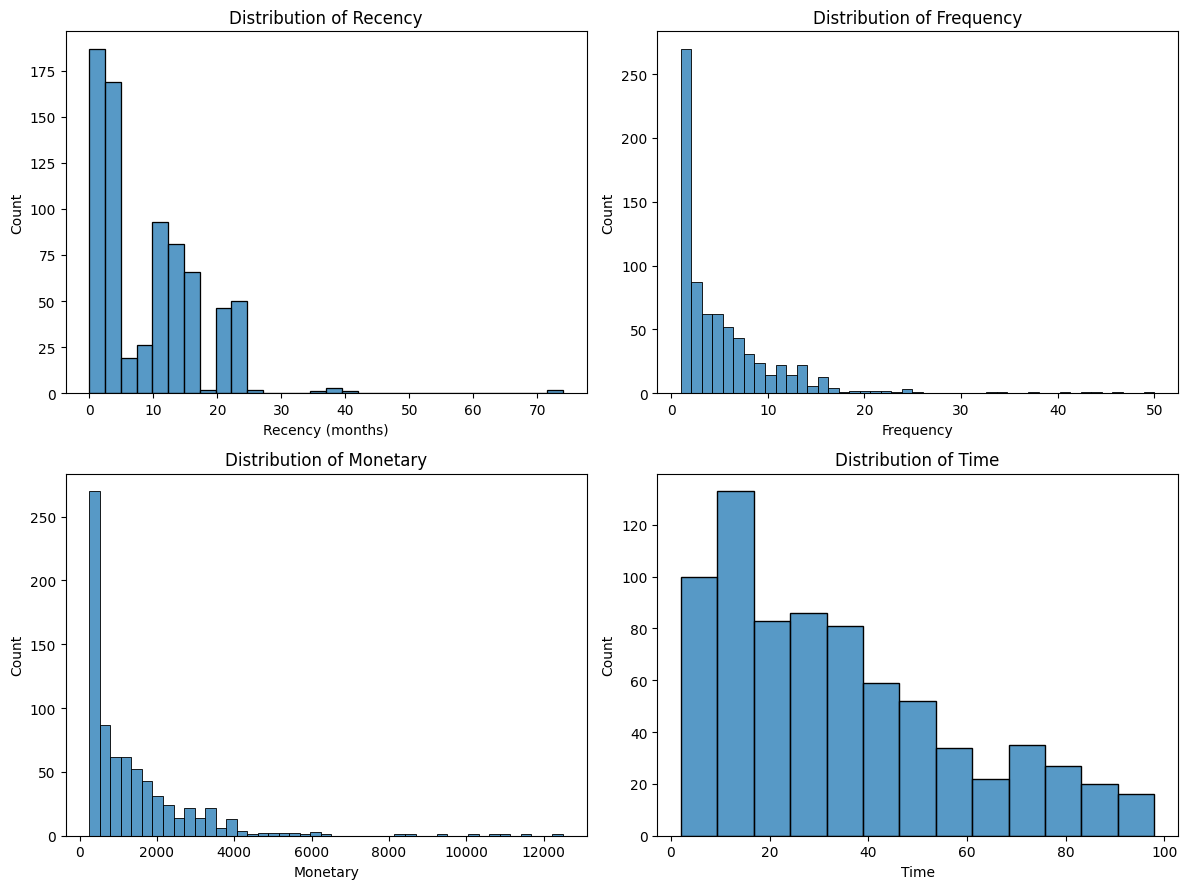

In [12]:
# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 9))

# Plot histograms for each column
sns.histplot(df.iloc[:, 0], ax=axes[0, 0])
sns.histplot(df.iloc[:, 1], ax=axes[0, 1])
sns.histplot(df.iloc[:, 2], ax=axes[1, 0])
sns.histplot(df.iloc[:, 3], ax=axes[1, 1])

# Set titles for each subplot
axes[0, 0].set_title("Distribution of Recency")
axes[0, 1].set_title("Distribution of Frequency")
axes[1, 0].set_title("Distribution of Monetary")
axes[1, 1].set_title("Distribution of Time")

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

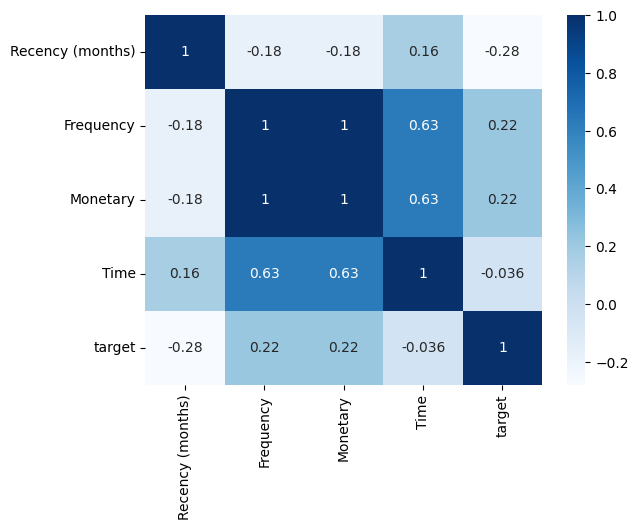

In [13]:
# Calculate Pearson's correlation values
corr = df.corr()
# Plot heatmap of corr values
sns.heatmap(corr, cmap="Blues", annot=True);

250 cc is donated every time. That explains the full correlation between frequency and monetary.  
Strong correlation between monetary, frequency and time. More visits, more blood, more time.

## Model Selection with TPOT

In [58]:
# Instantiate TPOTClassifier(
tpot = TPOTClassifier(
    generations=5,
    population_size=20,
    verbosity=2,
    scoring='roc_auc',
    random_state=999,
    disable_update_check=True,
    config_dict= 'TPOT light'
)
tpot.fit(X_train, y_train)

# AUC score for tpot model
tpot_auc_score = roc_auc_score(y_test, tpot.predict_proba(X_test)[:, 1])
print(f'\nAUC score: {tpot_auc_score:.4f}')

# Print best pipeline steps
print('\nBest pipeline steps:', end='\n')
for idx, (name, transform) in enumerate(tpot.fitted_pipeline_.steps, start=1):
    # Print idx and transform
    print(f'{idx}. {transform}')

                                                                                                                       
Generation 1 - Current best internal CV score: 0.7474021069369906
                                                                                                                       
Generation 2 - Current best internal CV score: 0.7474021069369906
                                                                                                                       
Generation 3 - Current best internal CV score: 0.7492868528846641
                                                                                                                       
Generation 4 - Current best internal CV score: 0.7500729983903719
                                                                                                                       
Generation 5 - Current best internal CV score: 0.7500729983903719
                                                                      

## Scaling Data Using StandardScaler

In [62]:
# Create a StandardScaler object with default parameters
scaler = StandardScaler()
# Fit the scaler to the train and test data to scale it, create respective dataframes
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), X_train.index, X_train.columns)
X_test_scaled = pd.DataFrame(scaler.fit_transform(X_test), X_test.index, X_test.columns)

## Model Training and Prediction

In [64]:
# Create a  LogisticRegression model using parameters determined by TPOT
lr = LogisticRegression(C = 0.5, dual=False, penalty='l2', random_state = 999)
# Fit the model on scaled data
lr.fit(X_train_scaled, y_train)
# Predict probability of binary classes using predict_proba
predict = lr.predict_proba(X_test_scaled)

## Calculating AUC Score

In [67]:
# Calculate the Area Under the ROC Curve (AUC) using the predicted probabilities
lr_auc_score = roc_auc_score(y_test, predict[:, 1])
# Print the AUC score
print(f'\nAUC score: {lr_auc_score:.4f}')


AUC score: 0.7606
